# Data Cleaning : 


<a id="home"></a>

### Cleaning Guide
- [a) Importing the necessary library](#library)
- [b) Put the necessary ddata in a DataFrame](#file-opening)
    - [i) Read the file into a DataFrame](#csv-to-data)
    - [ii) Select the necessary columns](#columns)
- [c) Handling the data](#cleaning)
    - [i) Handle null data](#null)
	- [ii) Change data Type](#data_type)
    - [iii) Handling outliers](#outliers)

- [d) Impact of features on risk of injury](#injury_risk)
- [e) Save the clean data](#save_file)

<a id="library"></a>

## <font style = 'color:blue'>a) Import the necessary library </font>


In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

<a id="file-opening"></a>
<a id="csv-to-data"></a>

## <font style = 'color:blue'>b) Put the necessary data in a DataFrame </font>

### <font style = 'color:blue'>i) Read the file into a DataFrame </font>


In [3]:
NSW_car_crash = pd.read_csv("data/NSW_Road_Crash_Data_2016-2020_CRASH .csv")

In [4]:
NSW_car_crash.head()

,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Time of crash - Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1088679,Fatal,Fatal,2016,2016,January,Saturday,00:01 - 01:59,BALDRY-PEAK HILL,RD,...,Left off cway into object,NaN,Vehicle - Object,Light truck,NaN,1,1,2,1,0
1,1088682,Fatal,Fatal,2016,2016,January,Monday,20:00 - 21:59,PRINCES,HWY,...,Off right bend into obj,Left,Vehicle - Object,Light truck,NaN,1,1,0,0,0
2,1088829,Non-casualty (towaway),Non-casualty (towaway),2016,2016,January,Friday,12:00 - 13:59,PRINCES,HWY,...,Same - other,NaN,Other angle,Light truck,Car (sedan/hatch),2,0,0,0,0
3,1088867,Non-casualty (towaway),Non-casualty (towaway),2016,2016,January,Friday,12:00 - 13:59,PALMER,ST,...,Opp - U-turn,NaN,Other angle,Station wagon,Utility,2,0,0,0,0
4,1088880,Non-casualty (towaway),Non-casualty (towaway),2016,2016,January,Friday,16:00 - 17:59,COLLEGE,ST,...,Same - Rear end,NaN,Rear end,Light truck,Car (sedan/hatch),3,0,0,0,0


<a id="columns"></a>

### <font style = 'color:blue'>i) Select the necessary columns </font>



In [5]:
NSW_car_crash.columns

Index(['Crash ID', 'Degree of crash', 'Degree of crash - detailed',
       'Reporting year', 'Year of crash', 'Month of crash',
       'Day of week of crash', 'Time of crash - Two-hour intervals',
       'Street of crash', 'Street type', 'Distance (from identifying feature)',
       'Direction (from identifying feature)', 'Identifying feature',
       'Identifying feature type', 'Town', 'Route no.', 'School zone location',
       'School zone active', 'Type of location', 'Latitude', 'Longitude',
       'LGA', 'Urbanisation', 'Conurbation 1', 'Alignment',
       'Primary permanent feature', 'Primary temporary feature',
       'Primary hazardous feature', 'Street lighting', 'Road surface',
       'Surface condition', 'Weather', 'Natural lighting', 'Signals operation',
       'Other traffic control', 'Speed limit', 'Road classification (admin)',
       'RUM - code', 'RUM - description', 'DCA - code', 'DCA - description',
       'DCA supplement', 'First impact type', 'Key TU type', 'Other 

In [6]:
NSW_car_crash = NSW_car_crash[['Crash ID', 'Degree of crash', 'Degree of crash - detailed','Year of crash', 'Month of crash',
       'Day of week of crash', 'Time of crash - Two-hour intervals','Latitude', 'Longitude','LGA', 'Urbanisation', 'Conurbation 1', 'Surface condition', 'Weather','Speed limit', 'Road classification (admin)', 'Alignment']]

<a id="cleaning"></a>
<a id="null"></a>

## <font style = 'color:blue'>b) Handling the data </font>

### <font style = 'color:blue'>i) Handling null values </font>

The function isnull().sum() return the number of null values in each columns. 

In [7]:
NSW_car_crash.isnull().sum()

Crash ID                              0
Degree of crash                       0
Degree of crash - detailed            0
Year of crash                         0
Month of crash                        0
Day of week of crash                  0
Time of crash - Two-hour intervals    0
Latitude                              0
Longitude                             0
LGA                                   0
Urbanisation                          0
Conurbation 1                         0
Surface condition                     0
Weather                               0
Speed limit                           0
Road classification (admin)           0
Alignment                             0
dtype: int64

Note : Here, the precedent function is not relevant. Indeed, the dictionary that comes with the raw_data shows that a few features admits the values "Unknown" that I will handle like a missing values. 

In case we don't have a dictionnary as detailed as I have, we can use the function df['column_name'].unique() to see the uniaue value in the column and detect presence of missing but not null values ('Unknown', 0, 999, ' ', ...)


In [1]:
NSW_car_crash.shape

NameError: name 'NSW_car_crash' is not defined

In [2]:
NSW_car_crash.groupby('Weather')['Crash ID'].count()

NameError: name 'NSW_car_crash' is not defined

Weather is one of my problem's core. I need only known data. I dropped the Weather equal to Unknown or Other. 

I do the same for 'Time of crash - Two-hour intervals'

I dropped less than 1% of total rows. 

In [3]:
NSW_car_crash = NSW_car_crash[NSW_car_crash['Weather'] != 'Unknown']
NSW_car_crash = NSW_car_crash[NSW_car_crash['Weather'] != 'Other']

NameError: name 'NSW_car_crash' is not defined

In [11]:
NSW_car_crash[NSW_car_crash['Time of crash - Two-hour intervals'] == 'Unknown']['Crash ID'].count()

8

In [12]:
NSW_car_crash = NSW_car_crash[NSW_car_crash['Time of crash - Two-hour intervals'] != 'Unknown']

Urbanisation and Conurbation are not my main features. 
Morever, only 27 rows have missing data (since missing value in 'Conurbation 1' coincide with missing values in 'Urbanisation'

I choose to replace the 'Urbanisation''s missing value by the value of 'Urbanisation' of the nearest car crash (where value is known). 

Same for 'Conurbation 1'

In [13]:
NSW_car_crash[NSW_car_crash['Urbanisation'] == 'Country unknown']['Crash ID'].count()

27

In [14]:
NSW_car_crash[NSW_car_crash['Conurbation 1'] == 'Rest of NSW - Unknown']['Crash ID'].count()

26

In [15]:
##Distance calculation with gps coordinates by using haversine formula

import math

def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))
   

In [16]:
unknown_urbanisation = NSW_car_crash[NSW_car_crash['Urbanisation'] == 'Country unknown']

def urbanisation(urbanisation, LGA, Longitude, Latitude): 
    if urbanisation != 'Country unknown' : 
        return urbanisation
    else : 
        a = ''
        coord1 = [Latitude, Longitude]
        min_ID = 0
        min_dist = 9999999
        NSW_by_LGA = NSW_car_crash[NSW_car_crash['LGA'] == LGA]
        for index, crash in NSW_by_LGA.iterrows() :
            coord2 = [crash['Latitude'], crash['Longitude']]
            if haversine(coord1, coord2) < min_dist  and crash['Urbanisation'] != 'Country unknown': 
                  min_dist = haversine(coord1, coord2)
                  a = crash['Urbanisation']
        return a 
                      

def conurbation(conurbation, LGA, Longitude, Latitude): 
    if conurbation != 'Rest of NSW - Unknown' : 
        return conurbation
    else : 
        a= ''
        coord1 = [Latitude, Longitude]
        min_ID = 0
        min_dist = 9999999
        NSW_by_LGA = NSW_car_crash[NSW_car_crash['LGA'] == LGA]
        for index, crash in NSW_by_LGA.iterrows() :
            coord2 = [crash['Latitude'], crash['Longitude']]
            if haversine(coord1, coord2) < min_dist and crash['Conurbation 1'] != 'Rest of NSW - Unknown' : 
                  min_dist = haversine(coord1, coord2)
                  a = crash['Conurbation 1']
        return a 
                      
        
        

In [17]:
NSW_car_crash['Urbanisation'] = NSW_car_crash.apply(lambda x : urbanisation(x['Urbanisation'], x['LGA'], x['Longitude'], x['Latitude']), axis = 1)       
NSW_car_crash['Conurbation 1'] = NSW_car_crash.apply(lambda x: conurbation(x['Conurbation 1'], x['LGA'], x['Longitude'], x['Latitude']), axis = 1)

Aligment needs witness testimony, and I can't be sure that it impacts the risk of injury, before handling null values, I need more analysis. 

In [4]:
NSW_car_crash[NSW_car_crash['Alignment'] == 'Unknown']['Crash ID'].count()

NameError: name 'NSW_car_crash' is not defined

In [5]:
NSW_car_crash[NSW_car_crash['Surface condition'] == 'Unknown']['Crash ID'].count()
NSW_car_crash.groupby(['Surface condition', 'Weather'])['Crash ID'].count()

NameError: name 'NSW_car_crash' is not defined

In [20]:
NSW_car_crash[NSW_car_crash['Surface condition'] == 'Unknown']['Crash ID'].count()

14

I replace the speed limit by the most commun value, for a given Urbanisation. Indeed, dictionnary explain than Urbanisation partially depends of Speed limit. 

In [21]:
NSW_car_crash[NSW_car_crash['Speed limit'] == 'Unknown']['Crash ID'].count()

35

In [22]:
def speed_limit(speed, urbanisation):
    if speed == 'Unknown': 
        speed = NSW_car_crash.groupby(by = 'Urbanisation')['Speed limit'].agg(pd.Series.mode)[urbanisation]
    speed = int(speed[0:3].strip())
    return speed

NSW_car_crash['Speed limit'] = NSW_car_crash.apply(lambda x : speed_limit(x['Speed limit'], x['Urbanisation']), axis = 1)

<a id="data_type"></a>

### <font style = 'color:blue'>i) Change Data type </font>

Note : Speed limit was converted from String to Integer while handling the null value. 

Instead of giving 2 hours intevals as strings, I use the median hour. 

'03:00 - 04:59'  become 4

In [23]:
NSW_car_crash['Time of crash - Two-hour intervals'].unique()

array(['00:01 - 01:59', '20:00 - 21:59', '12:00 - 13:59', '16:00 - 17:59',
       '10:00 - 11:59', '08:00 - 09:59', '14:00 - 15:59',
       '22:00 - Midnight', '06:00 - 07:59', '04:00 - 05:59',
       '18:00 - 19:59', '02:00 - 03:59'], dtype=object)

In [24]:
def hour_of_crash(time_of_crash_two_hours_intervals):
    return int(time_of_crash_two_hours_intervals[0:2])+1

NSW_car_crash['hour'] = NSW_car_crash['Time of crash - Two-hour intervals'].apply(hour_of_crash)
NSW_car_crash.drop(columns = 'Time of crash - Two-hour intervals', inplace = True)
NSW_car_crash.head()

,Crash ID,Degree of crash,Degree of crash - detailed,Year of crash,Month of crash,Day of week of crash,Time of crash - Two-hour intervals,Latitude,Longitude,LGA,Urbanisation,Conurbation 1,Surface condition,Weather,Speed limit,Road classification (admin),Alignment,hour
0,1088679,Fatal,Fatal,2016,January,Saturday,00:01 - 01:59,-32.830075,148.293512,Parkes,Country non-urban,Rest of NSW - Rural,Dry,Fine,100,Local,Straight,1
1,1088682,Fatal,Fatal,2016,January,Monday,20:00 - 21:59,-35.800954,150.132066,Eurobodalla,Country non-urban,Rest of NSW - Rural,Wet,Raining,100,State,Curved,21
2,1088829,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,12:00 - 13:59,-34.031609,151.067157,Sutherland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,70,State,Straight,13
3,1088867,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,12:00 - 13:59,-33.847025,150.967695,Cumberland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Local,Straight,13
4,1088880,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,16:00 - 17:59,-33.873753,151.212595,Sydney,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Wet,Fine,50,Regional,Straight,17


For my knn model, I decided to focus on the need of doctor and not on the detailed degree of crash. That's why I converted the degree of crash to a binary value that tells is the crash caused injury or not. 

In [25]:
def has_injury(degree_crash): 
    if degree_crash == 'Non-casualty (towaway)' : 
        return 0
    else : 
        return 1
    
NSW_car_crash['Injuries'] = NSW_car_crash['Degree of crash'].apply(has_injury)

NSW_car_crash.head(50)

,Crash ID,Degree of crash,Degree of crash - detailed,Year of crash,Month of crash,Day of week of crash,Time of crash - Two-hour intervals,Latitude,Longitude,LGA,Urbanisation,Conurbation 1,Surface condition,Weather,Speed limit,Road classification (admin),Alignment,hour,Injuries
0,1088679,Fatal,Fatal,2016,January,Saturday,00:01 - 01:59,-32.830075,148.293512,Parkes,Country non-urban,Rest of NSW - Rural,Dry,Fine,100,Local,Straight,1,1
1,1088682,Fatal,Fatal,2016,January,Monday,20:00 - 21:59,-35.800954,150.132066,Eurobodalla,Country non-urban,Rest of NSW - Rural,Wet,Raining,100,State,Curved,21,1
2,1088829,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,12:00 - 13:59,-34.031609,151.067157,Sutherland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,70,State,Straight,13,0
3,1088867,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,12:00 - 13:59,-33.847025,150.967695,Cumberland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Local,Straight,13,0
4,1088880,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,16:00 - 17:59,-33.873753,151.212595,Sydney,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Wet,Fine,50,Regional,Straight,17,0
5,1089224,Fatal,Fatal,2016,January,Tuesday,10:00 - 11:59,-32.875241,151.660182,Newcastle,Newcastle met. area,Syd-Newc-Woll Gtr conurbation,Wet,Raining,50,Local,Curved,11,1
6,1089225,Fatal,Fatal,2016,January,Monday,20:00 - 21:59,-33.365570,151.398327,Central Coast,Country urban,Syd-Newc-Woll Gtr conurbation,Wet,Raining,60,Local,Curved,21,1
7,1089226,Fatal,Fatal,2016,January,Thursday,10:00 - 11:59,-29.564613,153.143024,Clarence Valley,Country urban,Rest of NSW - Urban,Dry,Fine,80,State,Curved,11,1
8,1089232,Fatal,Fatal,2016,January,Friday,08:00 - 09:59,-36.086957,149.055658,Snowy Monaro Regional,Country non-urban,Rest of NSW - Rural,Wet,Fine,100,Local,Curved,9,1
9,1089233,Fatal,Fatal,2016,January,Saturday,14:00 - 15:59,-34.246013,150.974065,Wollongong,Wollongong met. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,60,State,Straight,15,1


In [29]:
def day_date(row):
    month = row['Month of crash']
    day = 1
    year = row['Year of crash']
    date = f'{month} {day} {year}'
    timestamp = datetime.strptime(date, '%B %d %Y')
    return timestamp.date()

NSW_car_crash['Date of crash'] = NSW_car_crash.apply(day_date, axis = 1)

In [26]:
NSW_car_crash.dtypes

Crash ID                         int64
Degree of crash                 object
Degree of crash - detailed      object
Year of crash                    int64
Month of crash                  object
Day of week of crash            object
Latitude                       float64
Longitude                      float64
LGA                             object
Urbanisation                    object
Conurbation 1                   object
Surface condition               object
Weather                         object
Speed limit                      int64
Road classification (admin)     object
Alignment                       object
hour                             int64
Injuries                         int64
dtype: object

<a id="outliers"></a>

### <font style = 'color:blue'>iii) Handling outliers </font>

We use histograms to see the distributions of crashes along differents features. 

array([[<AxesSubplot:title={'center':'Crash ID'}>,
        <AxesSubplot:title={'center':'Year of crash'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Speed limit'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'Injuries'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

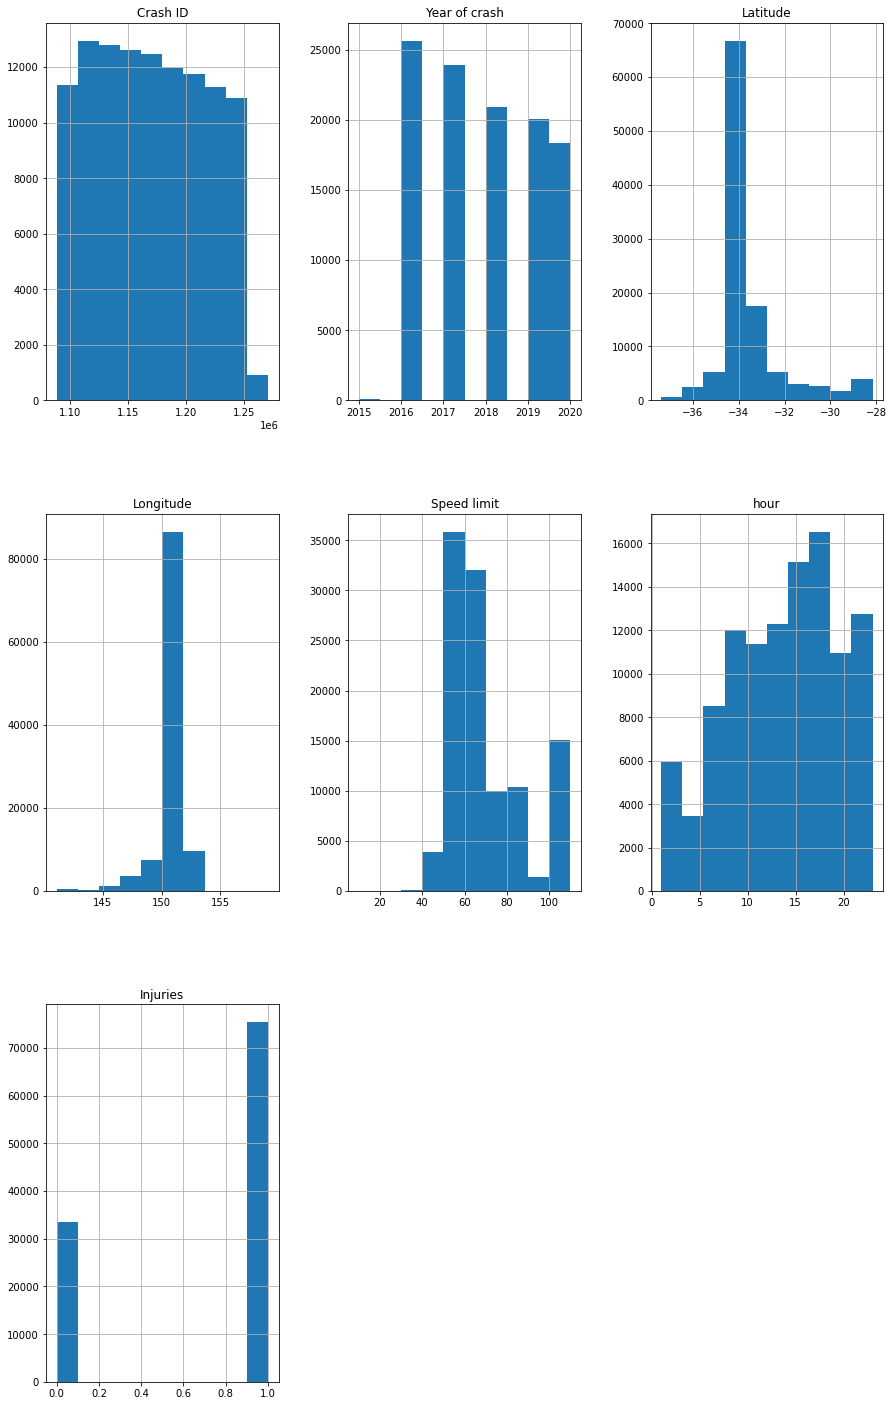

In [27]:
NSW_car_crash.hist(figsize=(15,25))


Some crashes happened in 2015. That's because crashes that happends at the end of the year can take some time to be recorded, and appear in the report only the year after. I dropped these rows. 

In [28]:
print(NSW_car_crash[NSW_car_crash['Year of crash'] <= 2015].count())
NSW_car_crash = NSW_car_crash[NSW_car_crash['Year of crash'] > 2015]

Crash ID                       67
Degree of crash                67
Degree of crash - detailed     67
Year of crash                  67
Month of crash                 67
Day of week of crash           67
Latitude                       67
Longitude                      67
LGA                            67
Urbanisation                   67
Conurbation 1                  67
Surface condition              67
Weather                        67
Speed limit                    67
Road classification (admin)    67
Alignment                      67
hour                           67
Injuries                       67
dtype: int64


<a id="injury_risk"></a>

## <font style = 'color:blue'>d) Impact of features on risk of injury </font>

The same work is more visble in TABLEAU Workbook. 

In [6]:
NSW_car_crash.columns
columns_name = ['Year of crash', 'Month of crash', 'Day of week of crash','LGA', 'Urbanisation', 'Conurbation 1',
       'Surface condition', 'Weather', 'Speed limit',
       'Road classification (admin)', 'Alignment', 'hour']

NameError: name 'NSW_car_crash' is not defined

Year of crash
count    5.000000
mean     0.691399
std      0.006173
min      0.684294
25%      0.686966
50%      0.690453
75%      0.696312
max      0.698967
Name: Injuries, dtype: float64
Month of crash
count    12.000000
mean      0.691735
std       0.010678
min       0.673645
25%       0.684001
50%       0.692034
75%       0.699240
max       0.710776
Name: Injuries, dtype: float64
Day of week of crash
count    7.000000
mean     0.691600
std      0.008784
min      0.680679
25%      0.684478
50%      0.695204
75%      0.695969
max      0.704427
Name: Injuries, dtype: float64
LGA
count    130.000000
mean       0.712128
std        0.054478
min        0.600313
25%        0.677112
50%        0.707030
75%        0.741724
max        0.875000
Name: Injuries, dtype: float64
Urbanisation
count    5.000000
mean     0.679902
std      0.018414
min      0.659882
25%      0.661551
50%      0.683585
75%      0.695917
max      0.698577
Name: Injuries, dtype: float64
Conurbation 1
count    3.000000
me

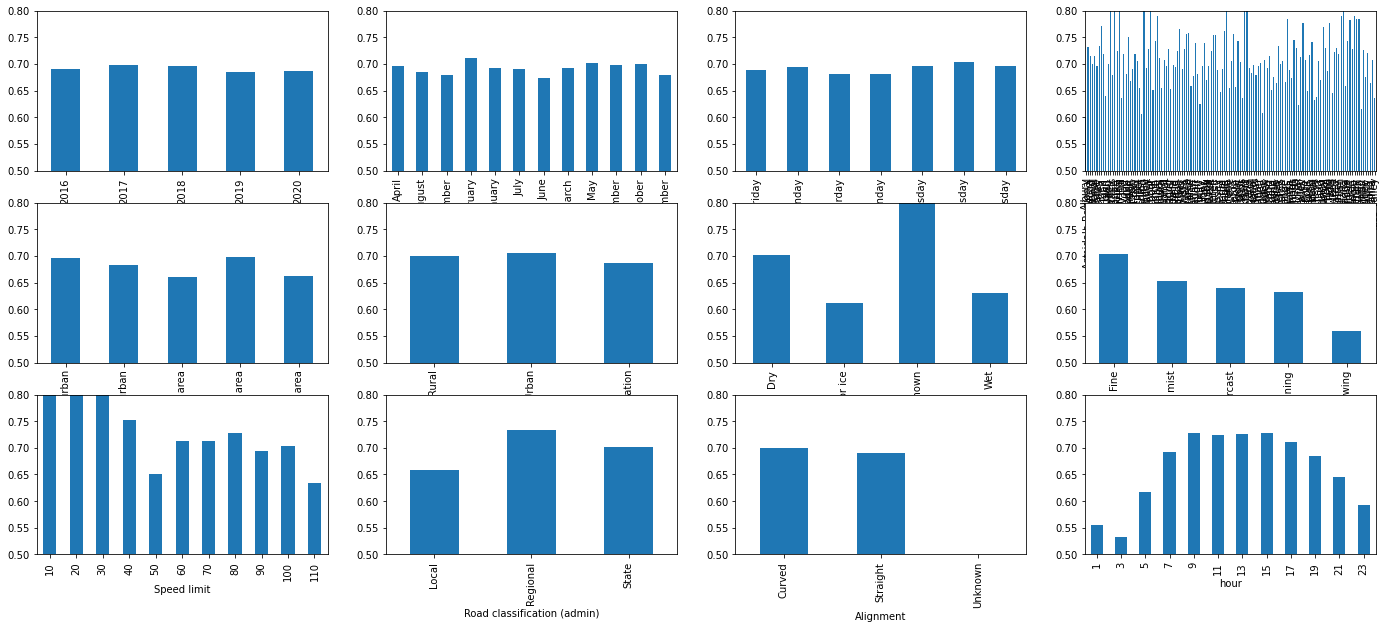

In [31]:
fig, axs = plt.subplots(3,4, figsize = (24,10))
axe = axs.ravel()

i=0
for column in columns_name : 
    impact_on_injuries = NSW_car_crash.groupby(column)['Injuries'].mean()
    impact_on_injuries.plot.bar(ax=axe[i], ylim = (0.5,0.8))
    print(column)
    print(impact_on_injuries.describe())
    i += 1

In [33]:
#Alignment has not a sufficient impact on risk of injury. 

NSW_car_crash.drop(columns= 'Alignment', implace = True)


,Crash ID,Degree of crash,Degree of crash - detailed,Year of crash,Month of crash,Day of week of crash,Latitude,Longitude,LGA,Urbanisation,Conurbation 1,Surface condition,Weather,Speed limit,Road classification (admin),hour,Injuries,Date of crash
0,1088679,Fatal,Fatal,2016,January,Saturday,-32.830075,148.293512,Parkes,Country non-urban,Rest of NSW - Rural,Dry,Fine,100,Local,1,1,2016-01-01
1,1088682,Fatal,Fatal,2016,January,Monday,-35.800954,150.132066,Eurobodalla,Country non-urban,Rest of NSW - Rural,Wet,Raining,100,State,21,1,2016-01-01
2,1088829,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-34.031609,151.067157,Sutherland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,70,State,13,0,2016-01-01
3,1088867,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-33.847025,150.967695,Cumberland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Local,13,0,2016-01-01
4,1088880,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-33.873753,151.212595,Sydney,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Wet,Fine,50,Regional,17,0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110025,1268977,Non-casualty (towaway),Non-casualty (towaway),2020,October,Tuesday,-28.616251,153.545872,Byron,Country non-urban,Rest of NSW - Rural,Dry,Fine,100,State,1,0,2020-10-01
110026,1270012,Injury,Minor/Other Injury,2020,August,Sunday,-33.749100,150.827266,Blacktown,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Local,11,1,2020-08-01
110028,1270508,Injury,Minor/Other Injury,2020,August,Friday,-33.946079,151.175528,Bayside,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,60,State,7,1,2020-08-01
110029,1270956,Injury,Minor/Other Injury,2020,August,Thursday,-33.713998,150.323518,Blue Mountains,Country urban,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Regional,17,1,2020-08-01


<a id="save_file"></a>

## <font style = 'color:blue'>e) Save the clean data </font>


In [8]:
filename = 'NSW_crash_clean.csv'
NSW_car_crash.to_csv(filename)

NameError: name 'NSW_car_crash' is not defined